In [1]:
import pandas as pd
import numpy as np


In [2]:
dataset = pd.read_csv("twitter.csv")

In [3]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
dataset.isnull()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
24778,False,False,False,False,False,False,False
24779,False,False,False,False,False,False,False
24780,False,False,False,False,False,False,False
24781,False,False,False,False,False,False,False


In [5]:
dataset.isnull().sum()


Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [7]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [8]:
dataset["labels"]=dataset["class"].map({0:"hate speech",
                                        1:"Offensive language",
                                        2:"No hate or Offensive language"})

dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or Offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or Offensive language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive language


In [9]:
data = dataset[["tweet","labels"]]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or Offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language
24779,"you've gone and broke the wrong heart baby, an...",No hate or Offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language
24781,youu got wild bitches tellin you lies,Offensive language


In [10]:
import re
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\navyasrigangigunta\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# importing stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [12]:
stemmer=nltk.SnowballStemmer("english")

In [13]:
#data cleaning
def clean_data(text):
    text=str(text).lower()
    text=re.sub('htts?://\S+|www\.S+', '',text)
    text=re.sub('\[.*?\]', '',text)
    text=re.sub('<.*?>+', '','tetxt')
    text=re.sub('[%s]' %re.escape(string.punctuation), '',text)
    text=re.sub('\n', '',text)
    text=re.sub('\w*\d\w*', '',text)
    text=[word for word in text.split(' ') if word  not in stopwords]
    text= " ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text= " ".join(text)
    return text
                

In [14]:
print(type(data["tweet"]))

<class 'pandas.core.series.Series'>


In [15]:
data["tweet"] = data["tweet"].apply(clean_data)



C:\Users\navyasrigangigunta\AppData\Local\Temp\ipykernel_26000\2619076916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [16]:
data

,tweet,labels
0,tetxt,No hate or Offensive language
1,tetxt,Offensive language
2,tetxt,Offensive language
3,tetxt,Offensive language
4,tetxt,Offensive language
...,...,...
24778,tetxt,Offensive language
24779,tetxt,No hate or Offensive language
24780,tetxt,Offensive language
24781,tetxt,Offensive language


In [17]:
x =np.array(data["tweet"])
y =np.array(data["labels"])


In [18]:
x

array(['tetxt', 'tetxt', 'tetxt', ..., 'tetxt', 'tetxt', 'tetxt'],
      dtype=object)

In [19]:
y

array(['No hate or Offensive language', 'Offensive language',
       'Offensive language', ..., 'Offensive language',
       'Offensive language', 'No hate or Offensive language'],
      dtype=object)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [23]:
 cv = CountVectorizer()
x= cv.fit_transform(x)

In [24]:
x

<24783x1 sparse matrix of type '<class 'numpy.int64'>'
	with 24783 stored elements in Compressed Sparse Row format>

In [25]:
y

array(['No hate or Offensive language', 'Offensive language',
       'Offensive language', ..., 'Offensive language',
       'Offensive language', 'No hate or Offensive language'],
      dtype=object)

In [26]:
x_train, x_test, y_train, y_test = train_test_split( x,y, test_size =0.33, random_state =42)


In [27]:
x_train

<16604x1 sparse matrix of type '<class 'numpy.int64'>'
	with 16604 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.tree import DecisionTreeClassifier


In [29]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [30]:
y_pred = dt.predict(x_test)

In [31]:

#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[   0, 1379,    0],
       [   0, 6335,    0],
       [   0,  465,    0]], dtype=int64)

In [32]:

import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

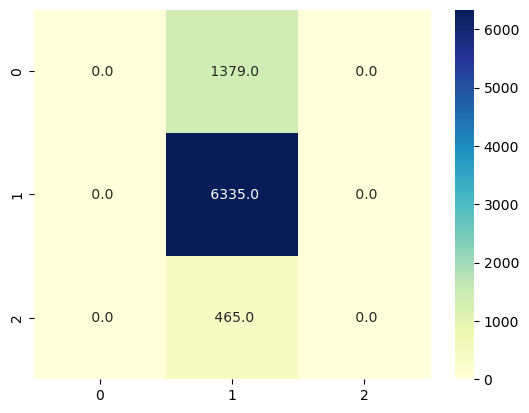

In [33]:
sns.heatmap(cm,annot=True, fmt=" .1f",cmap="YlGnBu")

In [34]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)

0.7745445653502874

In [35]:
sample = "Let's untie and kill all the people who are protesting the government"
sample = clean_data(sample)

In [36]:
sample

'tetxt'

In [37]:
data1 = cv.transform([sample]).toarray()

In [38]:
data1

array([[1]], dtype=int64)

In [39]:
dt.predict(data1)

array(['Offensive language'], dtype=object)

In [40]:
sample1 = "tobacco consumption is bad for health"
sample1 = clean_data(sample)

In [41]:
sample1

'tetxt'

In [49]:
data2= cv.transform([sample1]).toarray()


In [50]:
data2

array([[1]], dtype=int64)

In [51]:
dt.predict(data2)

array(['Offensive language'], dtype=object)